# `plot_missing()`: analyze missing values

## Overview

The function `plot_missing()` enables thorough analysis of the missing values and their impact on the dataset. The *impact* is the change in the dataset's characteristics (e.g., the histogram of a numerical column or bar chart of a categorical column) after removing the rows with missing values from the dataset. The following describes the functionality of `plot_missing()` for a given dataframe `df`.

1. `plot_missing(df)`: plots the amount and position of missing values, and their relationship between columns
2. `plot_missing(df, x)`: plots the impact of the missing values in column `x` on all other columns
3. `plot_missing(df, x, y)`: plots the impact of the missing values from column `x` on column `y` in various ways.

Next, we demonstrate the functionality of `plot_missing()`. 

## Load the dataset

`dataprep.eda` supports **Pandas** and **Dask** dataframes. Here, we will load the well-known [Titanic dataset](https://www.kaggle.com/c/titanic/data) into a Pandas dataframe.

In [1]:
import pandas as pd
df = pd.read_csv("https://www.openml.org/data/get_csv/16826755/phpMYEkMl", na_values = ['?'])

## Get an overview of the missing values with `plot_missing(df)`

`plot_missing(df)` will generate four visualizations that lead to different understandings of the missing values in the dataset:
1. A statistics table. This table shows the statistics of missing value for the entire dataframe. "Missing Cell" represents the total number of missing cells in the whole dataframe. "Missing Cell (%)" represents the percent of missing cells in the whole dataframe. "Missing Columns" and "Missing Rows" represent the number of columns/rows which contain at least one missing cell. "Avg Missing Cells per Column" and "Avg Missing Cells per Row" represent the average number of missing cells within one column/row.
2. A bar chart depicting the amount of missing values in each column. There is an insight tab in the upper right-hand corner, which shows names of the columns and rows containing the most missing values, as well as their missing rate.
3. A missing spectrum plot. In this visualization, the dataset is divided into bins, and each bin corresponds to a rectangle in the plot. Then, each rectangle is gray-scaled depending on the number of missing values in the bin. A light colour represents none or few missing values, and a dark colour represents many missing values.
4. A nullity correlation heatmap. This visualization depcits how strongly the presence or absence of one variable affects the presence of another. From the Pyhton library [missingno](https://github.com/ResidentMario/missingno): Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).
5. The fifth tab displays a dendrogram which allows one to correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmaps. The dendrogram uses a [hierarchical clustering algorithm](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

The following is an example:

NumExpr defaulting to 4 threads.



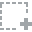
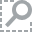
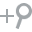
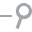
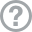
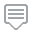
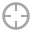
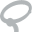
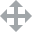
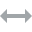
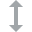
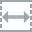
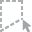
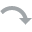
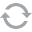
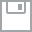
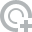
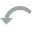
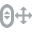
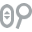
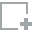
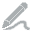
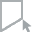
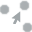
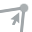

In [2]:
from dataprep.eda.missing import plot_missing
plot_missing(df)

Note that the nullity correlation heatmap will be empty if less than two columns are partially missing.

## Understand the *impact* of the missing values in column *x* with `plot_missing(df, x)`

After getting an overview of the missing values with `plot_missing(df)`, we can analyze the impact of the missing values in a specific column `x` with `plot_missing(df, x)`. The *impact* of the missing values in column `x` is the change in the dataset's characteristics after removing the rows where column `x`'s values are missing. Here, we consider two types of characteristics: the histogram (for numerical columns) and the bar chart (for categorical columns). `plot_missing(df, x)` plots the histogram or bar chart (for appropriate column types) for each column before and after removing the rows that contain missing values in column `x`.

The following shows an example:

In [3]:
plot_missing(df, "age")

## Understand the impact of the missing values in column `x` on column `y` with `plot_missing(df, x, y)`


`plot_missing(df, x)` only displays the frequency distribution of each column before and after removing the rows containing missing values in column `x`. If the user is specifically concerned with the impact of the missing values in one column `x` on another column `y`, she/he can call `plot_missing(df, x, y)`. `plot_missing(df, x, y)` plots the impact of the missing values in column `x` on column `y` in different ways depending on the type of column `y`.

If `y` is a numerical column, `plot_missing(df, x, y)` shows the impact as a histogram, pdf, cdf, and box plot. The following shows an example:

In [5]:
plot_missing(df, "age", "fare")

If `y` is a categorical column, `plot_missing(df, x, y)` shows the impact as a bar chart. The following shows an example:

In [6]:
plot_missing(df, "age", "sex")